# Cross-Validation
Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. Basically, he data is instead split repeatedly and multiple models are trained.

In [1]:
import mglearn
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

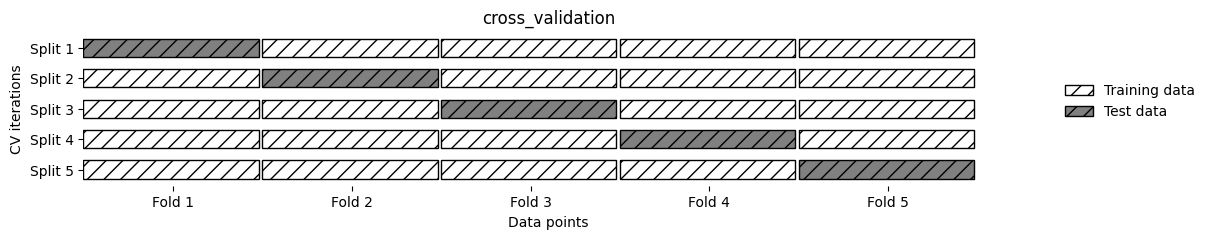

In [2]:
#Cross vlaidation using k-fold with 5 folds, means that the data is split into 5 parts
# and each part is used as a test set once, while the other 4 parts are used for training
# the model. This is done 5 times, and the results are averaged to get a more reliable estimate of the model's performance.
mglearn.plots.plot_cross_validation()

In [4]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris.data, iris.target)
print(f"Cross-validation scores: {scores}")
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
#Compute the mean and standard deviation of the cross-validation scores
print(f"Mean cross-validation score: {scores.mean():.3f}")

Mean cross-validation score: 0.973


## Stratified k-Fold Cross-Validation and Other Strategies

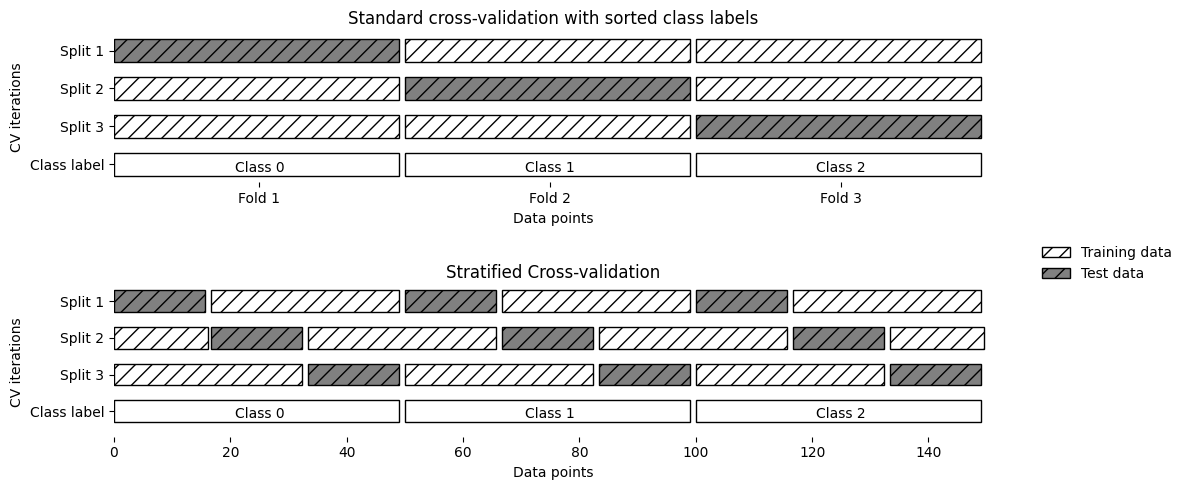

In [6]:
mglearn.plots.plot_stratified_cross_validation()

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
#Eaeach fold corresponds to one of the classes in the iris dataset
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")
#! Couldn't reproduce the results in the book for some reason here, supose to be lower than 0.5

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [9]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[0.98 0.96 0.96]


In [ ]:
#Leave-one-out cross-validation
#!Time consumiong, good for small datasets
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


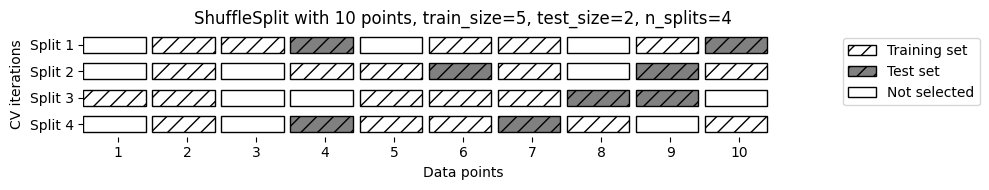

In [11]:
#Shuffle-split cross-validation
mglearn.plots.plot_shuffle_split()

In [13]:
from sklearn.model_selection import ShuffleSplit
# Shuffle-split cross-validation randomly splits the data into a training and a test set
# multiple times, providing more randomness compared to k-fold cross-validation.
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.98666667 0.92       0.94666667 0.97333333 0.96       0.98666667
 0.93333333 0.96       0.97333333 0.94666667]


In [16]:
# Cross-validation with groups
#common in medical applications, where you might have multiple samples from the same patient, but are interested in generalizing to new patients
from sklearn.model_selection import cross_val_score, GroupKFold
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)

# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

# Defining the model
logreg = LogisticRegression()

# Using GroupKFold for cross-validation
cv = GroupKFold(n_splits=3)
scores = cross_val_score(logreg, X, y, cv=cv, groups=groups)
print("Cross-validation scores:\n{}".format(scores))


Cross-validation scores:
[0.75       0.6        0.66666667]
